In [45]:


import pandas as pd
import pylab as pl
import spacy

df = pd.read_json('../data/indeed.json')


# Cleaning data
Remove unnecessary columns

In [46]:
cleaned_data = df['data']

Map key value to column

In [47]:
cleaned_data = pd.json_normalize(cleaned_data)
cleaned_data

,id,title,salary,type,posted,descriptions,company.name,company.location
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,Estimated $104K - $132K a year,Full-time,PostedPosted 11 days ago,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...",Estimated $127K - $161K a year,Full-time,PostedPosted 30+ days ago,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL"
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,"From $100,000 a year",Full-time,EmployerActive 17 days ago,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753"
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,Estimated $102K - $130K a year,Full-time,PostedToday,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA"
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),,,PostedPosted 5 days ago,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526"
5,354c2f47-e02b-44ed-a275-9558ab5441bf,,,,,[],,
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,"$112,000 - $179,000 a year",Full-time,PostedPosted 7 days ago,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,Estimated $60.9K - $77.2K a year,,PostedPosted 30+ days ago,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090"
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,"$74,140 - $167,284 a year",Part-time,EmployerActive 6 days ago,[Job description - *We need a web developer an...,CodingBlades,Remote
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",Estimated $65.7K - $83.2K a year,Full-time,PostedPosted 30+ days ago,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States


## Transformation
There is an address on the location, but we need only the country

In [48]:
def detect_location(text):
    """
    :str text containing a country
    :rtype: str
    """
    nlp = spacy.load("en_core_web_sm")
    # Process the text with spaCy
    doc = nlp(text)
    result_list = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    if len(result_list) > 0:
        return " ".join(result_list)
    return text



In [49]:
cleaned_data['company.processed_location'] = cleaned_data['company.location'].apply(detect_location)
cleaned_data

,id,title,salary,type,posted,descriptions,company.name,company.location,company.processed_location
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,Estimated $104K - $132K a year,Full-time,PostedPosted 11 days ago,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250","Madison, IN 47250"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...",Estimated $127K - $161K a year,Full-time,PostedPosted 30+ days ago,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL",Chicago
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,"From $100,000 a year",Full-time,EmployerActive 17 days ago,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753",Neptune City
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,Estimated $102K - $130K a year,Full-time,PostedToday,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA",Pittsburgh PA
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),,,PostedPosted 5 days ago,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526","Pensacola, FL 32526"
5,354c2f47-e02b-44ed-a275-9558ab5441bf,,,,,[],,,
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,"$112,000 - $179,000 a year",Full-time,PostedPosted 7 days ago,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States,United States
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,Estimated $60.9K - $77.2K a year,,PostedPosted 30+ days ago,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090",Wexford
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,"$74,140 - $167,284 a year",Part-time,EmployerActive 6 days ago,[Job description - *We need a web developer an...,CodingBlades,Remote,Remote
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",Estimated $65.7K - $83.2K a year,Full-time,PostedPosted 30+ days ago,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States,United States


Convert relative date to a of format d-m-y

In [50]:
from datetime import timedelta, datetime


def parse(date_literal_value: str):
    if not date_literal_value.isalnum():
        result = date_literal_value.split("+")[0]
    else:
        result = date_literal_value
    return result


def convert_relative_date(relative_date: str):
    current_date = datetime.now()
    split_date = relative_date.split()
    if len(split_date) >= 3:
        split_date = split_date[1:]

    if "today" in relative_date.lower():
        estimated_posting_date = current_date
        return estimated_posting_date.strftime("%d-%m-%y")
    if "days" in relative_date:
        # If "days" is present, assume it represents days
        parsed_date = parse(split_date[0])
        days_ago = int(parsed_date)
        estimated_posting_date = current_date - timedelta(days=days_ago)
    elif "months" in relative_date:
        # If "months" is present, assume it represents months
        parsed_date = parse(split_date[0])
        months_ago = int(parsed_date)
        estimated_posting_date = current_date - timedelta(days=months_ago * 30)  # Assuming 30 days in a month
    else:
        return None  # Unable to determine the format

    return estimated_posting_date.strftime("%d-%m-%y")


cleaned_data["posted"] = cleaned_data["posted"].apply(convert_relative_date)
cleaned_data


,id,title,salary,type,posted,descriptions,company.name,company.location,company.processed_location
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,Estimated $104K - $132K a year,Full-time,05-08-23,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250","Madison, IN 47250"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...",Estimated $127K - $161K a year,Full-time,17-07-23,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL",Chicago
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,"From $100,000 a year",Full-time,30-07-23,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753",Neptune City
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,Estimated $102K - $130K a year,Full-time,16-08-23,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA",Pittsburgh PA
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),,,11-08-23,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526","Pensacola, FL 32526"
5,354c2f47-e02b-44ed-a275-9558ab5441bf,,,,None,[],,,
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,"$112,000 - $179,000 a year",Full-time,09-08-23,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States,United States
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,Estimated $60.9K - $77.2K a year,,17-07-23,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090",Wexford
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,"$74,140 - $167,284 a year",Part-time,10-08-23,[Job description - *We need a web developer an...,CodingBlades,Remote,Remote
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",Estimated $65.7K - $83.2K a year,Full-time,17-07-23,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States,United States


Transform salary

In [51]:
import re


def format_salary(salary_text: str):
    pattern_with_k = r'\$([\d,]+)K\s*-\s*\$([\d,]+)K'
    pattern_without_k = r'\$([\d,]+)\s*-\s*\$([\d,]+)'

    match = re.search(pattern_with_k, salary_text)
    if match:
        # Because K mean 1000 we need to multiply it by 1000
        lower_salary = int(match.group(1).replace(".", "")) * 1000
        upper_salary = int(match.group(2).replace(".", "")) * 1000
    elif re.search(pattern_without_k, salary_text):
        match = re.search(pattern_without_k, salary_text)
        lower_salary = match.group(1).replace(",", "")
        upper_salary = match.group(2).replace(",", "")
    else:
        return None
    return [lower_salary, upper_salary]


cleaned_data['salary'] = cleaned_data['salary'].apply(format_salary)
cleaned_data


,id,title,salary,type,posted,descriptions,company.name,company.location,company.processed_location
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,"[104000, 132000]",Full-time,05-08-23,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250","Madison, IN 47250"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...","[127000, 161000]",Full-time,17-07-23,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL",Chicago
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,None,Full-time,30-07-23,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753",Neptune City
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,"[102000, 130000]",Full-time,16-08-23,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA",Pittsburgh PA
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),None,,11-08-23,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526","Pensacola, FL 32526"
5,354c2f47-e02b-44ed-a275-9558ab5441bf,,None,,None,[],,,
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,"[112000, 179000]",Full-time,09-08-23,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States,United States
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,None,,17-07-23,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090",Wexford
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,"[74140, 167284]",Part-time,10-08-23,[Job description - *We need a web developer an...,CodingBlades,Remote,Remote
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",None,Full-time,17-07-23,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States,United States


# Transformation
Matching programming language based on the description and the job offer title

In [52]:
framework_df = pd.read_csv("../data/framework_list.csv")
language_df = pd.read_csv("../data/programming-languages.csv")
combined = framework_df["Framework Name"].tolist()+language_df["name"].tolist()
# TODO fix lang matching
def find_matching_languages(text: list[str] | str):
    matching_languages = []
    if type(text)==list:
        for entry in text:
            for language in combined:
                if len(language)==1:
                    result = [text for text in entry.lower().split(" ") if text.lower() == language.lower()]
                    matching_languages=matching_languages+result
                    pass
                if language.lower() in entry.lower():
                    matching_languages.append(language)
    else:
        for language in combined:
            if len(language)==1:
                result = [text for text in text.lower().split(" ") if text.lower() == language.lower()]
                matching_languages=matching_languages+result
                pass
            if language.lower() in text.lower():
                matching_languages.append(language)
    return list(set(matching_languages))





cleaned_data["skills"] = cleaned_data['title'].apply(find_matching_languages) + cleaned_data['descriptions'].apply(
    find_matching_languages)
cleaned_data['skills']=cleaned_data["skills"].apply(lambda x:list(set(x)))
cleaned_data

,id,title,salary,type,posted,descriptions,company.name,company.location,company.processed_location,skills
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,"[104000, 132000]",Full-time,05-08-23,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250","Madison, IN 47250","[Io, R, C]"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...","[127000, 161000]",Full-time,17-07-23,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL",Chicago,"[Go, Ch, R, es, Id, IMP, C, Io]"
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,None,Full-time,30-07-23,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753",Neptune City,"[R, PPL, es, C, Io, Sed]"
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,"[102000, 130000]",Full-time,16-08-23,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA",Pittsburgh PA,"[R, Id, C, Python, SPARK, Io]"
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),None,,11-08-23,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526","Pensacola, FL 32526","[Ch, R, es, C, Io, TAL, Trac, Java]"
5,354c2f47-e02b-44ed-a275-9558ab5441bf,,None,,None,[],,,,[]
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,"[112000, 179000]",Full-time,09-08-23,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States,United States,"[Cel, Ch, Go, R, es, rc, ACC, C, TAL, Arc]"
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,None,,17-07-23,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090",Wexford,"[R, PPL, Id, make, C, Scala, Tea, Io, FOCUS]"
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,"[74140, 167284]",Part-time,10-08-23,[Job description - *We need a web developer an...,CodingBlades,Remote,Remote,"[R, es, Id, C, Io]"
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",None,Full-time,17-07-23,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States,United States,"[R, es, Blue, C, Tea, Io]"


Cleaning
Drop row where at salary is None

In [61]:
cleaned_data.replace("", None, inplace=True)
cleaned_data.dropna(subset=['title'], how='all', inplace=True)

,id,title,salary,type,posted,descriptions,company.name,company.location,company.processed_location,skills
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,"[104000, 132000]",Full-time,05-08-23,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250","Madison, IN 47250","[Io, R, C]"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...","[127000, 161000]",Full-time,17-07-23,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL",Chicago,"[Go, Ch, R, es, Id, IMP, C, Io]"
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,None,Full-time,30-07-23,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753",Neptune City,"[R, PPL, es, C, Io, Sed]"
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,"[102000, 130000]",Full-time,16-08-23,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA",Pittsburgh PA,"[R, Id, C, Python, SPARK, Io]"
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),None,None,11-08-23,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526","Pensacola, FL 32526","[Ch, R, es, C, Io, TAL, Trac, Java]"
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,"[112000, 179000]",Full-time,09-08-23,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States,United States,"[Cel, Ch, Go, R, es, rc, ACC, C, TAL, Arc]"
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,None,None,17-07-23,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090",Wexford,"[R, PPL, Id, make, C, Scala, Tea, Io, FOCUS]"
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,"[74140, 167284]",Part-time,10-08-23,[Job description - *We need a web developer an...,CodingBlades,Remote,Remote,"[R, es, Id, C, Io]"
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",None,Full-time,17-07-23,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States,United States,"[R, es, Blue, C, Tea, Io]"
10,66918319-4ed2-42ed-9270-53cd94065624,Signal Processing Software Engineer (On-Site),None,None,09-08-23,[TX360: Dallas - North Bldg 13510 North Centra...,Raytheon,"Dallas, TX (Northeast Dallas area)",Dallas,"[Processing, SIGNAL, R, es, C, Tea, UNITY]"


In [104]:
import matplotlib.pyplot as plt
# cleaned_data['salary'].apply(lambda x: (x[0]+x[1])/2)
def process(x):
    if not x:
        return 0
    return (int(x[0])+int(x[1]))/2

cleaned_data['salary']=cleaned_data["salary"].apply(process)
cleaned_data

TypeError: 'float' object is not subscriptable

In [105]:
cleaned_data

,id,title,salary,type,posted,descriptions,company.name,company.location,company.processed_location,skills
0,b24fea3-0d4c-4115-b63b-66231c75c161,Senior Embedded Software Engineer,118000.0,Full-time,05-08-23,"[BS/MS/PhD degree in Computer Science, Compute...",Grote Industries,"Madison, IN 47250","Madison, IN 47250","[Io, R, C]"
1,dbc36beb-5b0f-4e80-9b97-ca37e2158ba3,"Associate Principal, Software Engineering: Mid...",144000.0,Full-time,17-07-23,[Provide subject matter expertise for implemen...,Options Clearing Corporation,"Hybrid remote in Chicago, IL",Chicago,"[Go, Ch, R, es, Id, IMP, C, Io]"
2,9b133e93-23e4-4d97-8344-3ff56b4954d3,ASP.Net C# Blazor Application Developer,0.0,Full-time,30-07-23,"[A growing, dynamic company based in Monmouth ...",Spectrotel,"Neptune City, NJ 07753",Neptune City,"[R, PPL, es, C, Io, Sed]"
3,01df4c10-b4ca-4001-ba74-c96611322b58,Python developer,116000.0,Full-time,16-08-23,"[D Python/Spark onsite position., Candidate sh...",Virtusa,"Hybrid remote in Pittsburgh, PA",Pittsburgh PA,"[R, Id, C, Python, SPARK, Io]"
4,fcfbcaf3-ee24-4308-a359-5566335a08a1,Senior Java Developer (ISD Developer V),0.0,None,11-08-23,[Recent experience using Test Driven developme...,Navy Federal Credit Union,"Pensacola, FL 32526","Pensacola, FL 32526","[Ch, R, es, C, Io, TAL, Trac, Java]"
5,354c2f47-e02b-44ed-a275-9558ab5441bf,None,0.0,None,None,[],None,None,None,[]
6,b62a6c59-b7be-47ea-acea-29899d56b3f1,Accela Software Developer,145500.0,Full-time,09-08-23,[Peraton is searching for a talented Accela So...,Peraton,Remote in United States,United States,"[Cel, Ch, Go, R, es, rc, ACC, C, TAL, Arc]"
7,f348c741-343c-4be2-a726-d131caba91d6,Junior Developer,0.0,None,17-07-23,[We are seeking the right individual to join o...,MDfit,"Wexford, PA 15090",Wexford,"[R, PPL, Id, make, C, Scala, Tea, Io, FOCUS]"
8,852d2d66-1233-46a4-aaa1-7454d957acc6,Software Developer,120712.0,Part-time,10-08-23,[Job description - *We need a web developer an...,CodingBlades,Remote,Remote,"[R, es, Id, C, Io]"
9,ff9f01f2-87da-4ccc-b8be-705a683328c4,"Junior Frontend Developer - Full-time, Remote",0.0,Full-time,17-07-23,[Bluelight Consulting is seeking a Junior Fron...,Bluelight Consulting,Remote in United States,United States,"[R, es, Blue, C, Tea, Io]"


<Axes: xlabel='posted'>

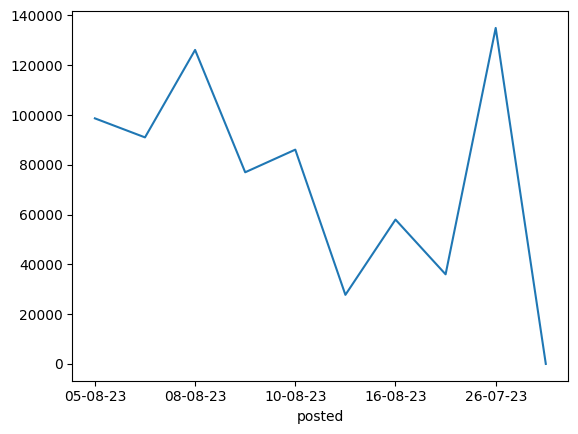

In [153]:
grouped = cleaned_data.sort_values(by="posted").groupby('posted')["salary"].mean()

grouped.plot()
# plt.plot(grouped['posted'].to_list(), grouped["salary"].to_list())
# grouped

In [127]:
to_plot = cleaned_data.groupby('company.location')["company.location"].count()
plt.plot(to_plot.get().tolist())


KeyError: 'company.location'

In [146]:
" ".join(cleaned_data['skills'].tolist())

TypeError: sequence item 0: expected str instance, list found